# Regression with Keras

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 4>

A. <a href="#Build a baseline model">Build a baseline model</a>  
B. <a href="#Normalize the data">Normalize the data</a>  
C. <a href="#Increase the number of epochs">Increase the number of epochs</a>  
D. <a href="#Increase the number of hidden layers">Increase the number of hidden layers</a>   
E. <a href="#Report">Report</a>

F. <a href="#Lift">Checking the model efficiency</a>

</font>
</div>

# Download and Clean Dataset


<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete_data.shape

(1030, 9)

In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [6]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [8]:
n_cols = predictors.shape[1] # number of predictors

<a id='Build a baseline model'></a>
# A. Build a baseline model

In [9]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [10]:
model = regression_model()

In [11]:
# Define a function to build a list of mean squared errors 
# with the model, predictor values and number of epochs as arguments
def calcul_MSE(model, predictor, num_epochs):

    MSE_list = []
    Repetition = 50

    for i in range(Repetition):

        X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=None)

        # fit the model and train the model on the training data using 50 epochs.
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, verbose=2)

        # Make predictions using the testing set
        pred = model.predict(X_test)

        # The mean squared error
        MSE = mean_squared_error(y_test, pred)
        print(f'--------- MSE {i+1}/{Repetition} = {MSE:.2f}------------------------------------------')
        MSE_list.append(MSE)
    
    return MSE_list

In [12]:
# Build the list of mean squared errors
MSE_list_1 = calcul_MSE(model, predictors, 50)

Epoch 1/50
23/23 - 0s - loss: 8038.2373 - val_loss: 6382.0083 - 435ms/epoch - 19ms/step
Epoch 2/50
23/23 - 0s - loss: 5642.7471 - val_loss: 5596.9937 - 48ms/epoch - 2ms/step
Epoch 3/50
23/23 - 0s - loss: 4822.1069 - val_loss: 4675.0361 - 50ms/epoch - 2ms/step
Epoch 4/50
23/23 - 0s - loss: 3754.2437 - val_loss: 3348.2297 - 48ms/epoch - 2ms/step
Epoch 5/50
23/23 - 0s - loss: 2584.3679 - val_loss: 2264.4622 - 48ms/epoch - 2ms/step
Epoch 6/50
23/23 - 0s - loss: 1793.8972 - val_loss: 1726.4861 - 49ms/epoch - 2ms/step
Epoch 7/50
23/23 - 0s - loss: 1458.6740 - val_loss: 1430.9396 - 53ms/epoch - 2ms/step
Epoch 8/50
23/23 - 0s - loss: 1264.4044 - val_loss: 1271.6074 - 54ms/epoch - 2ms/step
Epoch 9/50
23/23 - 0s - loss: 1129.7756 - val_loss: 1134.5221 - 47ms/epoch - 2ms/step
Epoch 10/50
23/23 - 0s - loss: 1002.7789 - val_loss: 1006.6084 - 49ms/epoch - 2ms/step
Epoch 11/50
23/23 - 0s - loss: 893.9285 - val_loss: 902.0615 - 52ms/epoch - 2ms/step
Epoch 12/50
23/23 - 0s - loss: 807.6879 - val_loss: 

In [13]:
# Calculate the length, the mean and the standard deviation
length_MSE_A = len(MSE_list_1)
mean_MSE_A = np.mean(MSE_list_1)
sd_MSE_A = np.std(MSE_list_1)

In [14]:
# Print the values
print(f'Number of mean squared errors: {length_MSE_A}')
print(f'Mean of the mean squared errors: {mean_MSE_A:.2f}')
print(f'Standard deviation of the mean squared errors: {sd_MSE_A:.2f}')

Number of mean squared errors: 50
Mean of the mean squared errors: 55.62
Standard deviation of the mean squared errors: 15.77


<a id='Normalize the data'></a>
# B. Normalize the data

In [15]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [16]:
MSE_list_B = calcul_MSE(model, predictors_norm, 50)

Epoch 1/50
23/23 - 0s - loss: 1518.7294 - val_loss: 1498.7498 - 80ms/epoch - 3ms/step
Epoch 2/50
23/23 - 0s - loss: 1435.5061 - val_loss: 1416.9076 - 48ms/epoch - 2ms/step
Epoch 3/50
23/23 - 0s - loss: 1353.4398 - val_loss: 1333.7765 - 53ms/epoch - 2ms/step
Epoch 4/50
23/23 - 0s - loss: 1269.4467 - val_loss: 1250.5288 - 51ms/epoch - 2ms/step
Epoch 5/50
23/23 - 0s - loss: 1186.9758 - val_loss: 1167.4325 - 48ms/epoch - 2ms/step
Epoch 6/50
23/23 - 0s - loss: 1104.7930 - val_loss: 1087.7499 - 47ms/epoch - 2ms/step
Epoch 7/50
23/23 - 0s - loss: 1026.2219 - val_loss: 1011.3270 - 45ms/epoch - 2ms/step
Epoch 8/50
23/23 - 0s - loss: 951.9429 - val_loss: 938.7043 - 50ms/epoch - 2ms/step
Epoch 9/50
23/23 - 0s - loss: 882.0389 - val_loss: 872.4622 - 45ms/epoch - 2ms/step
Epoch 10/50
23/23 - 0s - loss: 818.7568 - val_loss: 809.8511 - 49ms/epoch - 2ms/step
Epoch 11/50
23/23 - 0s - loss: 758.4567 - val_loss: 752.7272 - 49ms/epoch - 2ms/step
Epoch 12/50
23/23 - 0s - loss: 703.7103 - val_loss: 698.8416

In [17]:
# Calculate the length, the mean and the standard deviation
length_MSE_B = len(MSE_list_B)
mean_MSE_B = np.mean(MSE_list_B)
sd_MSE_B = np.std(MSE_list_B)

In [18]:
# Print the values
print(f'Number of mean squared errors: {length_MSE_B}')
print(f'Mean of the mean squared errors: {mean_MSE_B:.2f}')
print(f'Standard deviation of the mean squared errors: {sd_MSE_B:.2f}')

Number of mean squared errors: 50
Mean of the mean squared errors: 46.81
Standard deviation of the mean squared errors: 27.48


In [19]:
# DataFrame
data = {'A':[mean_MSE_A , sd_MSE_A], 'B':[mean_MSE_B , sd_MSE_B]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['Mean', 'StD'])
  
# print the data 
df.round(2)

,A,B
Mean,55.62,46.81
StD,15.77,27.48


<a id='Increase the number of epochs'></a>
# C Increase the number of epochs

Replacing 50 for 100 epochs

In [20]:
# Build the list of mean squared errors
MSE_list_C = calcul_MSE(model, predictors_norm, 100)

Epoch 1/100
23/23 - 0s - loss: 34.8906 - val_loss: 34.4431 - 76ms/epoch - 3ms/step
Epoch 2/100
23/23 - 0s - loss: 34.8382 - val_loss: 34.5485 - 44ms/epoch - 2ms/step
Epoch 3/100
23/23 - 0s - loss: 34.6956 - val_loss: 34.5294 - 45ms/epoch - 2ms/step
Epoch 4/100
23/23 - 0s - loss: 34.6989 - val_loss: 34.5954 - 42ms/epoch - 2ms/step
Epoch 5/100
23/23 - 0s - loss: 34.6227 - val_loss: 34.5348 - 44ms/epoch - 2ms/step
Epoch 6/100
23/23 - 0s - loss: 34.6909 - val_loss: 34.5267 - 44ms/epoch - 2ms/step
Epoch 7/100
23/23 - 0s - loss: 34.5826 - val_loss: 34.8702 - 44ms/epoch - 2ms/step
Epoch 8/100
23/23 - 0s - loss: 34.5688 - val_loss: 34.7294 - 44ms/epoch - 2ms/step
Epoch 9/100
23/23 - 0s - loss: 34.5221 - val_loss: 34.7454 - 42ms/epoch - 2ms/step
Epoch 10/100
23/23 - 0s - loss: 34.6117 - val_loss: 34.8259 - 43ms/epoch - 2ms/step
Epoch 11/100
23/23 - 0s - loss: 34.5305 - val_loss: 34.7412 - 43ms/epoch - 2ms/step
Epoch 12/100
23/23 - 0s - loss: 34.4658 - val_loss: 34.8717 - 42ms/epoch - 2ms/step
E

In [21]:
# Calculate the length, the mean and the standard deviation
length_MSE_C = len(MSE_list_C)
mean_MSE_C = np.mean(MSE_list_C)
sd_MSE_C = np.std(MSE_list_C)

In [22]:
# Print the values
print(f'Number of mean squared errors: {length_MSE_C}')
print(f'Mean of the mean squared errors: {mean_MSE_C:.2f}')
print(f'Standard deviation of the mean squared errors: {sd_MSE_C:.2f}')

Number of mean squared errors: 50
Mean of the mean squared errors: 35.80
Standard deviation of the mean squared errors: 2.90


In [23]:
# initialise data of lists. 
data = {'A':[mean_MSE_A , sd_MSE_A], 'B':[mean_MSE_B , sd_MSE_B],
        'C':[mean_MSE_C , sd_MSE_C]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['Mean', 'StD'])

# print the data 
df.round(2)

,A,B,C
Mean,55.62,46.81,35.8
StD,15.77,27.48,2.9


<a id='Increase the number of hidden layers'></a>
# D. Increase the number of hidden layers

Using a neural network with the following instead:
- Three hidden layers, each of 10 nodes and ReLU activation function.

In [24]:
# define regression model with 3 hidden layers, each of 10 nodes and ReLU activation function.
def regression_model_new():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [25]:
# build the model with regression_model_3hl
model_3hl = regression_model_new()

In [26]:
# Build the list of mean squared errors
MSE_list_D = calcul_MSE(model_3hl, predictors_norm, 50)

Epoch 1/50
23/23 - 1s - loss: 1584.8700 - val_loss: 1594.7338 - 890ms/epoch - 39ms/step
Epoch 2/50
23/23 - 0s - loss: 1557.6631 - val_loss: 1568.7164 - 81ms/epoch - 4ms/step
Epoch 3/50
23/23 - 0s - loss: 1530.7434 - val_loss: 1539.5416 - 76ms/epoch - 3ms/step
Epoch 4/50
23/23 - 0s - loss: 1496.5149 - val_loss: 1497.4061 - 75ms/epoch - 3ms/step
Epoch 5/50
23/23 - 0s - loss: 1445.9906 - val_loss: 1434.9315 - 66ms/epoch - 3ms/step
Epoch 6/50
23/23 - 0s - loss: 1370.4822 - val_loss: 1340.6222 - 79ms/epoch - 3ms/step
Epoch 7/50
23/23 - 0s - loss: 1256.9534 - val_loss: 1199.3862 - 69ms/epoch - 3ms/step
Epoch 8/50
23/23 - 0s - loss: 1096.7346 - val_loss: 1013.3333 - 64ms/epoch - 3ms/step
Epoch 9/50
23/23 - 0s - loss: 901.4434 - val_loss: 789.5486 - 72ms/epoch - 3ms/step
Epoch 10/50
23/23 - 0s - loss: 690.4177 - val_loss: 575.3195 - 58ms/epoch - 3ms/step
Epoch 11/50
23/23 - 0s - loss: 513.3311 - val_loss: 409.8473 - 62ms/epoch - 3ms/step
Epoch 12/50
23/23 - 0s - loss: 391.8183 - val_loss: 305.

In [27]:
# Calculate the length, the mean and the standard deviation
length_MSE_D = len(MSE_list_D)
mean_MSE_D = np.mean(MSE_list_D)
sd_MSE_D = np.std(MSE_list_D)

In [28]:
# Print the values
print(f'Number of mean squared errors: {length_MSE_D}')
print(f'Mean of the mean squared errors: {mean_MSE_D:.2f}')
print(f'Standard deviation of the mean squared errors: {sd_MSE_D:.2f}')

Number of mean squared errors: 50
Mean of the mean squared errors: 26.35
Standard deviation of the mean squared errors: 14.42


<a id='Report'></a>
# Report

In [29]:
# DataFrame

# initialise data of lists. 
data = {'A':[mean_MSE_A , sd_MSE_A], 'B':[mean_MSE_B , sd_MSE_B],
        'C':[mean_MSE_C , sd_MSE_C], 'D':[mean_MSE_D , sd_MSE_D]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['Mean', 'StD'])
df = df.round(2)
  
# print the data 
df 

,A,B,C,D
Mean,55.62,46.81,35.8,26.35
StD,15.77,27.48,2.9,14.42


<a id='Lift'></a>
# Checking the model efficiency

Using lift chart will help us to examinate how well is doing our model

In [51]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=None)

# fit the model and train the model on the training data using 50 epochs.
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)

# Make predictions using the testing set
ypred = model.predict(X_test)

Epoch 1/100
23/23 - 0s - loss: 207809.7344 - val_loss: 104504.0000 - 85ms/epoch - 4ms/step
Epoch 2/100
23/23 - 0s - loss: 58183.5000 - val_loss: 29858.2598 - 50ms/epoch - 2ms/step
Epoch 3/100
23/23 - 0s - loss: 19508.5254 - val_loss: 15455.0645 - 51ms/epoch - 2ms/step
Epoch 4/100
23/23 - 0s - loss: 12380.1455 - val_loss: 11858.1289 - 43ms/epoch - 2ms/step
Epoch 5/100
23/23 - 0s - loss: 10214.5039 - val_loss: 10352.1963 - 50ms/epoch - 2ms/step
Epoch 6/100
23/23 - 0s - loss: 9304.4395 - val_loss: 9663.8398 - 45ms/epoch - 2ms/step
Epoch 7/100
23/23 - 0s - loss: 8674.9619 - val_loss: 9252.8867 - 45ms/epoch - 2ms/step
Epoch 8/100
23/23 - 0s - loss: 8320.7432 - val_loss: 8916.8418 - 44ms/epoch - 2ms/step
Epoch 9/100
23/23 - 0s - loss: 8018.7935 - val_loss: 8746.3418 - 43ms/epoch - 2ms/step
Epoch 10/100
23/23 - 0s - loss: 7793.0464 - val_loss: 8524.7559 - 49ms/epoch - 2ms/step
Epoch 11/100
23/23 - 0s - loss: 7661.8237 - val_loss: 8587.4258 - 47ms/epoch - 2ms/step
Epoch 12/100
23/23 - 0s - los

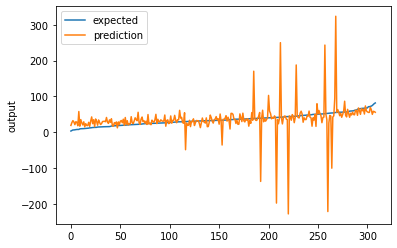

In [52]:
# Regression chart.
def chart_regression(ypred, target, sort=True):
    t = pd.DataFrame({'pred': ypred, 'y': target})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
# Plot the chart
chart_regression(ypred.flatten(),y_test)